In [12]:
from google.colab import files
files.upload()


Saving heart.csv to heart (1).csv


{'heart (1).csv': b'age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output\r\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\r\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\r\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\r\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\r\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\r\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\r\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\r\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\r\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\r\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\r\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\r\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\r\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\r\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\r\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\r\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\r\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\r\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\r\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\r\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\r\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\r\n44,1,2,130,233,0,1,179,1,0.4,2,0,2,1\r\n42,1,0,140,226,0,1,178,0,

In [13]:
# ===============================
# 1. IMPORT LIBRARIES
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay
)


In [14]:
# ===============================
# 2. LOAD DATASET
# ===============================
df = pd.read_csv("heart.csv")

X = df.drop("output", axis=1)
y = df["output"]


In [15]:
# ===============================
# 3. TRAIN–TEST SPLIT
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [16]:
# ===============================
# 4. TRAIN DECISION TREE MODEL
# ===============================
dt_model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,
    random_state=42
)

dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [17]:
# ===============================
# 5. PREDICTIONS
# ===============================
y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:, 1]   # IMPORTANT for ROC


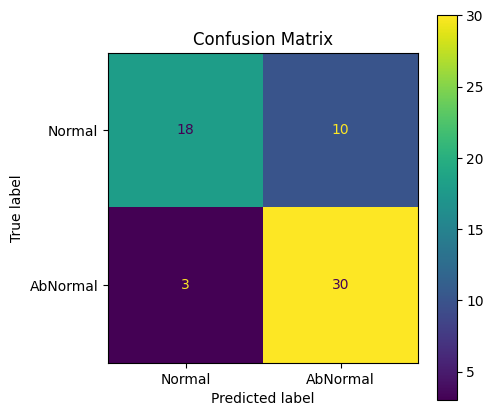

In [18]:
# ===============================
# 6. CONFUSION MATRIX
# ===============================
cm = confusion_matrix(y_test, y_pred)
classes = ["Normal", "AbNormal"]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
fig, ax = plt.subplots(figsize=(5, 5))
disp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()


In [19]:
# ===============================
# 7. CLASSIFICATION METRICS
# ===============================
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy :", accuracy * 100)
print("Precision:", precision * 100)
print("Recall   :", recall * 100)
print("F1 Score :", f1 * 100)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=classes))


Accuracy : 78.68852459016394
Precision: 75.0
Recall   : 90.9090909090909
F1 Score : 82.1917808219178

Classification Report:

              precision    recall  f1-score   support

      Normal       0.86      0.64      0.73        28
    AbNormal       0.75      0.91      0.82        33

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.80      0.79      0.78        61



ROC AUC Score: 0.8176406926406926


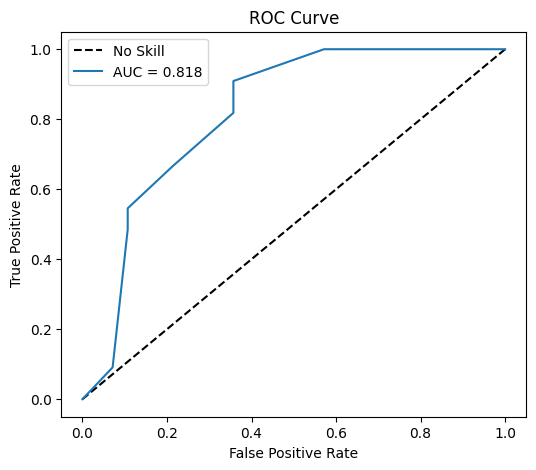

In [20]:
# ===============================
# 8. ROC – AUC CURVE (CORRECT)
# ===============================
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc_score))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()
